## SDE Salary Prediction using Machine Learning
#### Using real-world salary data obtained from insights.stackoverflow.com/survey 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [3]:
#keeping only essential features
df = df[["Country", "EdLevel", "Employment", "Age", "YearsCodePro", "ConvertedComp"]]
df = df.rename({"ConvertedComp":"Salary"}, axis=1)
df.head(4)

,Country,EdLevel,Employment,Age,YearsCodePro,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",NaN,27,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,4,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,25.0,4,NaN


In [4]:
#removing the null value datapoints from salary
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,Employment,Age,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,36.0,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,22.0,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,23.0,2,40070.0
11,Spain,Some college/university study without earning ...,Employed full-time,49.0,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",Employed full-time,53.0,20,38916.0


In [5]:
#dropping NULL values from all columns
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
Employment      0
Age             0
YearsCodePro    0
Salary          0
dtype: int64

In [6]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26487 entries, 7 to 64152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26487 non-null  object 
 1   EdLevel       26487 non-null  object 
 2   Age           26487 non-null  float64
 3   YearsCodePro  26487 non-null  object 
 4   Salary        26487 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [7]:
#viewing data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26487 entries, 7 to 64152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26487 non-null  object 
 1   EdLevel       26487 non-null  object 
 2   Age           26487 non-null  float64
 3   YearsCodePro  26487 non-null  object 
 4   Salary        26487 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [8]:
df.head(4)

,Country,EdLevel,Age,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36.0,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.0,2,40070.0
11,Spain,Some college/university study without earning ...,49.0,7,14268.0


#### Data Preprocessing   

We will now combine the different categories into single values for ease of processing. Also, since many countries only have a single occurance in the survey, they will not serve purpose in the learning mechanism. 

In [9]:
# Viewing age data to check if there are any outliers
df['Age'].describe()

count    26487.000000
mean        31.957096
std          8.259654
min          1.000000
25%         26.000000
50%         30.000000
75%         36.000000
max        279.000000
Name: Age, dtype: float64

In [10]:
df = df[df['Age'] < 65]
df = df[df['Age'] > 17]
df['Age'].describe()

count    26416.000000
mean        31.877597
std          7.893779
min         18.000000
25%         26.000000
50%         30.000000
75%         36.000000
max         64.000000
Name: Age, dtype: float64

In [11]:
df['Country'].value_counts()

United States     6693
United Kingdom    2059
India             1983
Germany           1722
Canada            1036
                  ... 
Bahamas              1
Guinea               1
Benin                1
Namibia              1
Yemen                1
Name: Country, Length: 148, dtype: int64

In [12]:
#function to group the least recurring countries into 'others' datatype
def shorten_categories(categories, cutoff):
    map_categories = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            map_categories[categories.index[i]] = categories.index[i]
        else:
            map_categories[categories.index[i]] = 'Other'
    return map_categories

In [13]:
country_mapping = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_mapping)
df.Country.value_counts()

Other                 7441
United States         6693
United Kingdom        2059
India                 1983
Germany               1722
Canada                1036
France                 889
Brazil                 884
Spain                  605
Netherlands            588
Australia              582
Poland                 512
Italy                  501
Russian Federation     467
Sweden                 454
Name: Country, dtype: int64

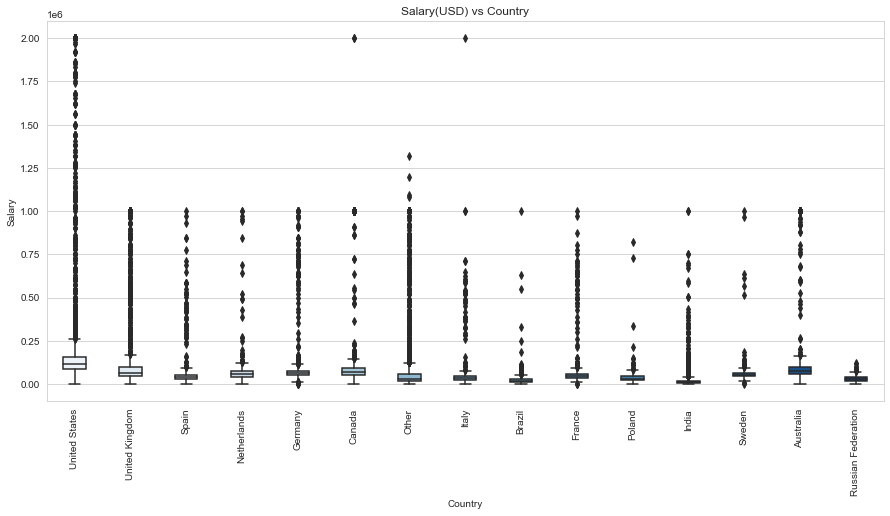

In [14]:
#visualizing salary trends using box-plot
sns.set_style("whitegrid")
x, y = plt.subplots(1, 1, figsize=(15,7))
sns.boxplot(y=df["Salary"], x=df["Country"], palette='Blues', width=0.4)
plt.title('Salary(USD) vs Country')
plt.xticks(rotation=90)
plt.show()

In [15]:
#according to the boxplot, the datapoints above the median are outliers, i.e. above the 0.25 or $250,000 line.
#Thus we will get rid of such data points
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

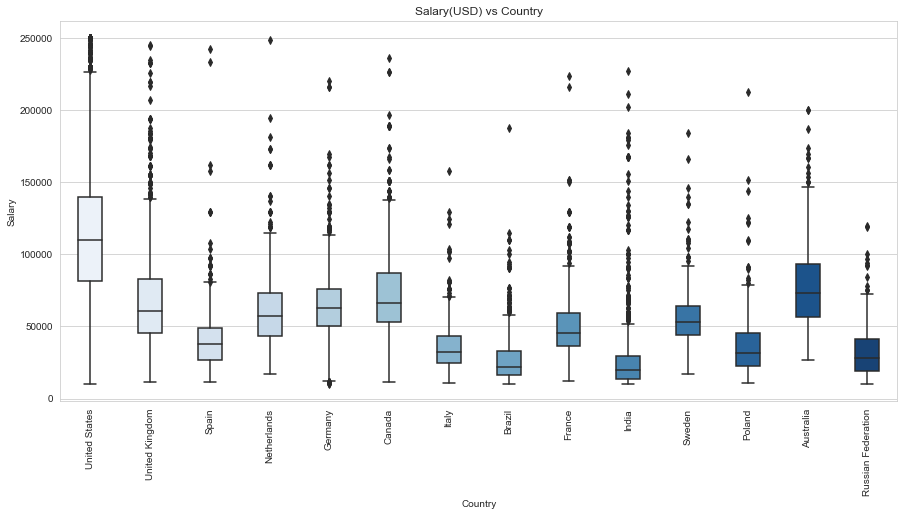

In [16]:
sns.set_style("whitegrid")
x, y = plt.subplots(1, 1, figsize=(15,7))
sns.boxplot(y=df["Salary"], x=df["Country"], palette='Blues', width=0.4)
plt.title('Salary(USD) vs Country')
plt.xticks(rotation=90)
plt.show()

In [17]:
#Cleaning the EdLevel and YearsCodePro columns
print(df['YearsCodePro'].unique(),'\n \n',df['EdLevel'].unique())

['13' '4' '2' '7' '20' '1' '3' '10' '12' '6' '28' '8' '23' '15' '25' '9'
 '11' 'Less than 1 year' '5' '21' '16' '18' '14' '32' '19' '22' '38' '30'
 '26' '27' '24' '17' '34' '35' '33' '36' '40' '31' '37' '41' '45' '39'
 '42' '29' '43' '44'] 
 
 ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'I never completed any formal education' 'Primary/elementary school']


In [18]:
#Cleaning the experience column
def clean_exp(x):
    if x=='More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)

In [19]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_exp)

In [20]:
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. ,  6. , 28. ,
        8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. , 18. ,
       14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 24. , 17. , 34. ,
       35. , 33. , 36. , 40. , 31. , 37. , 41. , 45. , 39. , 42. , 29. ,
       43. , 44. ])

In [21]:
#Cleaing Education Level data
def clean_ed(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [22]:
df['EdLevel'] = df['EdLevel'].apply(clean_ed)
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [23]:
df.head(4)

,Country,EdLevel,Age,YearsCodePro,Salary
7,United States,Bachelor’s degree,36.0,13.0,116000.0
9,United Kingdom,Master’s degree,22.0,4.0,32315.0
10,United Kingdom,Bachelor’s degree,23.0,2.0,40070.0
11,Spain,Less than a Bachelors,49.0,7.0,14268.0


#### Implementing Machine Learning 

Now that we are through with data preprocessing, we will perform label encoding and then apply machine learning algorithms. 

In [24]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [25]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [26]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

In [27]:
X

,Country,EdLevel,Age,YearsCodePro
7,13,0,36.0,13.0
9,12,2,22.0,4.0
10,12,0,23.0,2.0
11,10,1,49.0,7.0
12,7,1,53.0,20.0
...,...,...,...,...
61917,4,0,36.0,16.0
61921,6,2,36.0,6.0
61993,12,0,31.0,7.0
63402,13,1,32.0,7.0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_percentage_error
model = LinearRegression()
model.fit(X, y.values)

LinearRegression()

In [29]:
y_predict = model.predict(X)
rmse = (np.sqrt(mean_squared_error(y, y_predict)))
r2 = r2_score(y, y_predict)
mape = mean_absolute_percentage_error(y, y_predict)
print("Model Evaluation:","\nRoot Mean Squared Error: ",rmse,"\nR2 Score: ",r2,"\nMean Absolute Percentage Error: ",mape*100)

Model Evaluation: 
Root Mean Squared Error:  38704.17858265708 
R2 Score:  0.328484130718414 
Mean Absolute Percentage Error:  61.288847719027665


<AxesSubplot:xlabel='Salary'>

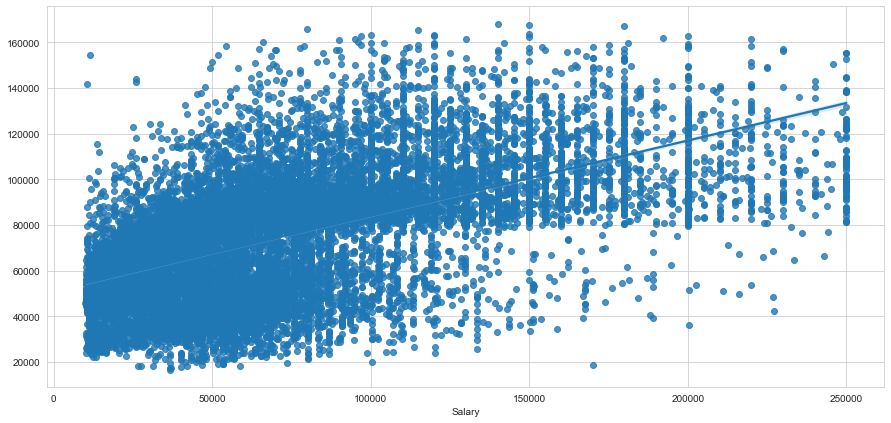

In [30]:
plt.subplots(1, 1, figsize=(15,7))
sns.regplot(x=y, y=y_predict)

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred = tree_model.predict(X)

In [33]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
print("Model Evaluation:\n","RMSE:${:,.02f}".format(rmse),"\nR2 Score: ",r2,"\nMean Absolute Percentage Error: ",mape*100)

Model Evaluation:
 RMSE:$23,124.58 
R2 Score:  0.7602887329151116 
Mean Absolute Percentage Error:  20.21770990615672


In [34]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [35]:
y_pred = random_forest_reg.predict(X)

In [36]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$23,985.20


We notice that the DecisionTreeRegressor yields the least percentage error and a higher R2 Score, thus it will be the model that we would use for prediction. 

In [37]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$23,124.58


Testing the model for custom model

In [38]:
X

,Country,EdLevel,Age,YearsCodePro
7,13,0,36.0,13.0
9,12,2,22.0,4.0
10,12,0,23.0,2.0
11,10,1,49.0,7.0
12,7,1,53.0,20.0
...,...,...,...,...
61917,4,0,36.0,16.0
61921,6,2,36.0,6.0
61993,12,0,31.0,7.0
63402,13,1,32.0,7.0


In [39]:
X = np.array([["India",'Master’s degree', 21, 15 ]])
X

array([['India', 'Master’s degree', '21', '15']], dtype='<U15')

In [40]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
print(X)

[[ 5.  2. 21. 15.]]


In [41]:
y_pred = regressor.predict(X)
y_pred

array([11169.])

Using Pickle to use the regressor and label encoder in our application

In [42]:
import pickle
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [43]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [44]:
y_pred = regressor_loaded.predict(X)
y_pred

array([11169.])